## Final Project Submission

Please fill out:
* Student name: Seyma Tas
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})




from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, r2_score, roc_auc_score, roc_curve, auc
# from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE, ADASYN


import warnings
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_csv('customer_churn_data.csv')

In [43]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [134]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [119]:
daykansas = 45/265
daykansas


0.16770186335403728

In [120]:
dayohio=27/161
dayohio

0.16770186335403728

In [122]:
daynj = 41/243
daynj

0.16872427983539096

In [123]:
28/166

0.1686746987951807

In [115]:
night = 11/244
night

0.045081967213114756

In [117]:
intl = 10 /2.7
intl

3.7037037037037033

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [45]:
df.describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.90, 0.99]).round(2)

account length  area code  number vmail messages  total day minutes  \
count         3333.00    3333.00                3333.00            3333.00   
mean           101.06     437.18                   8.10             179.78   
std             39.82      42.37                  13.69              54.47   
min              1.00     408.00                   0.00               0.00   
10%             50.00     408.00                   0.00             110.32   
25%             74.00     408.00                   0.00             143.70   
50%            101.00     415.00                   0.00             179.40   
75%            127.00     510.00                  20.00             216.40   
90%            152.00     510.00                  32.00             249.58   
99%            195.00     510.00                  43.00             305.17   
max            243.00     510.00                  51.00             350.80   

       total day calls  total day charge  total eve minutes  total eve calls  \
count          3333.00           3333.00            3333.00          3333.00   
mean            100.44             30.56             200.98           100.11   
std              20.07              9.26              50.71            19.92   
min               0.00              0.00               0.00             0.00   
10%              74.20             18.75             136.72            75.00   
25%              87.00             24.43             166.60            87.00   
50%             101.00             30.50             201.40           100.00   
75%             114.00             36.79             235.30           114.00   
90%             126.00             42.43             265.80           125.00   
99%             146.00             51.88             318.94           147.00   
max             165.00             59.64             363.70           170.00   

       total eve charge  total night minutes  total night calls  \
count           3333.00              3333.00            3333.00   
mean              17.08               200.87             100.11   
std                4.31                50.57              19.57   
min                0.00                23.20              33.00   
10%               11.62               136.34              75.00   
25%               14.16               167.00              87.00   
50%               17.12               201.20             100.00   
75%               20.00               235.30             113.00   
90%               22.59               264.20             125.00   
99%               27.11               317.45             146.68   
max               30.91               395.00             175.00   

       total night charge  total intl minutes  total intl calls  \
count             3333.00             3333.00           3333.00   
mean                 9.04               10.24              4.48   
std                  2.28                2.79              2.46   
min                  1.04                0.00              0.00   
10%                  6.13                6.70              2.00   
25%                  7.52                8.50              3.00   
50%                  9.05               10.30              4.00   
75%                 10.59               12.10              6.00   
90%                 11.89               13.70              8.00   
99%                 14.28               16.67             13.00   
max                 17.77               20.00             20.00   

       total intl charge  customer service calls  
count            3333.00                 3333.00  
mean                2.76                    1.56  
std                 0.75                    1.32  
min                 0.00                    0.00  
10%                 1.81                    0.00  
25%                 2.30                    1.00  
50%                 2.78                    1.00  
75%                 3.27                    2.00  
90%                 3.70                

In [46]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

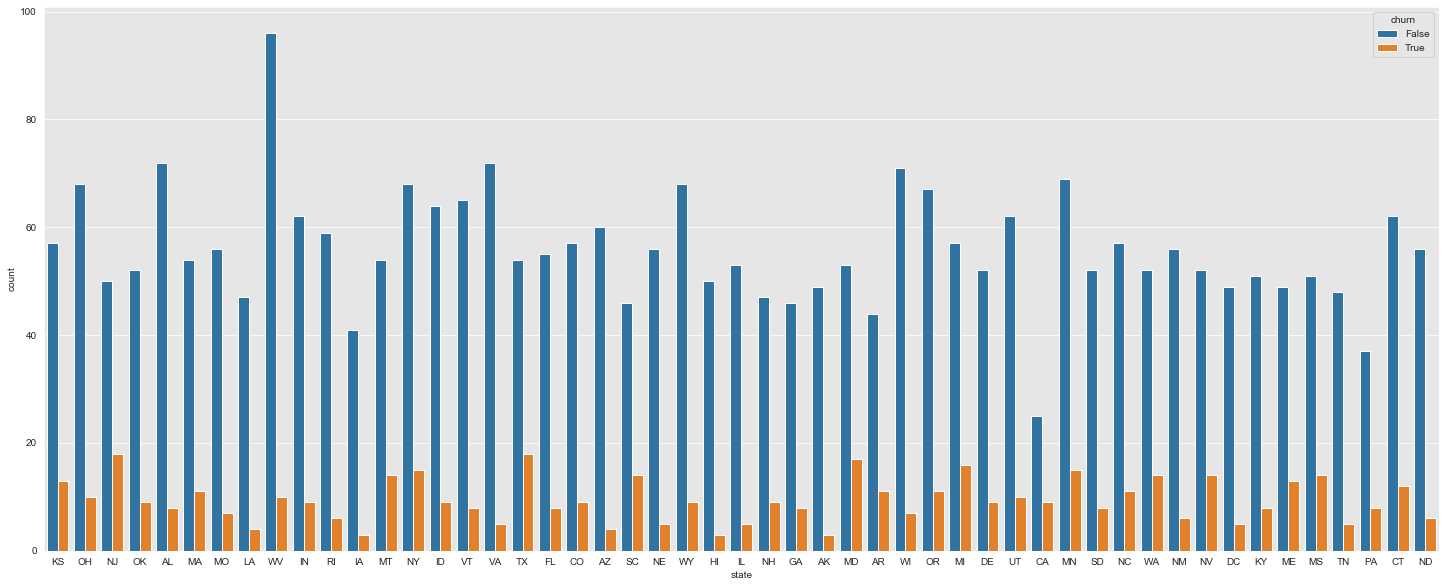

In [126]:
fig = plt.figure(figsize=(25, 10))
fig = sns.countplot(df['state'],hue=df['churn'])

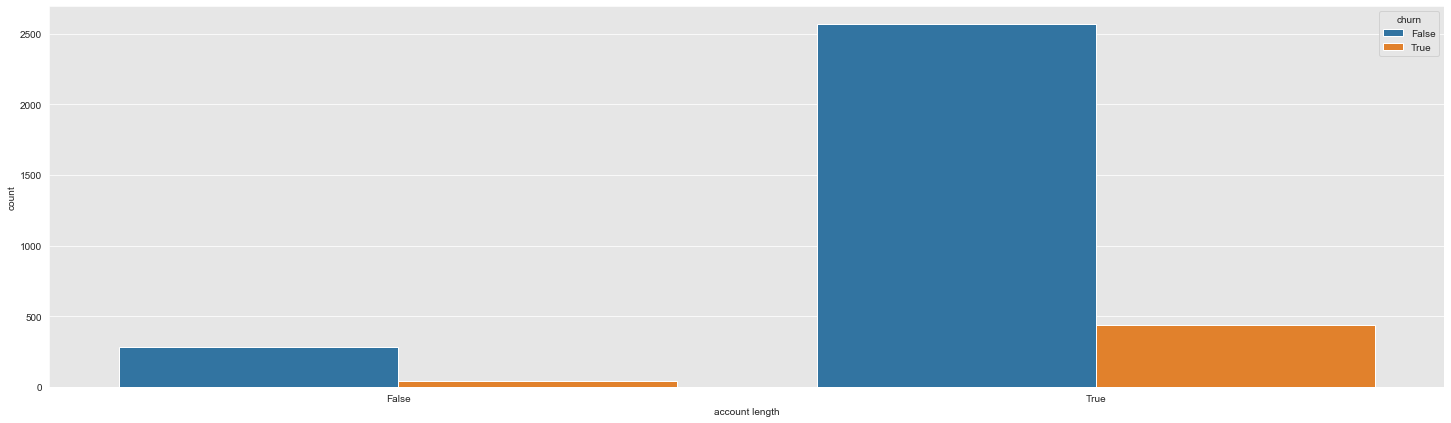

In [133]:
fig = plt.figure(figsize=(25, 7))
fig = sns.countplot(df['account length']>=50,hue=df['churn'])


In [101]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [107]:
df_plot = df[['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
              'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']].copy()
# df_plot = df[['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
#               'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']].copy()

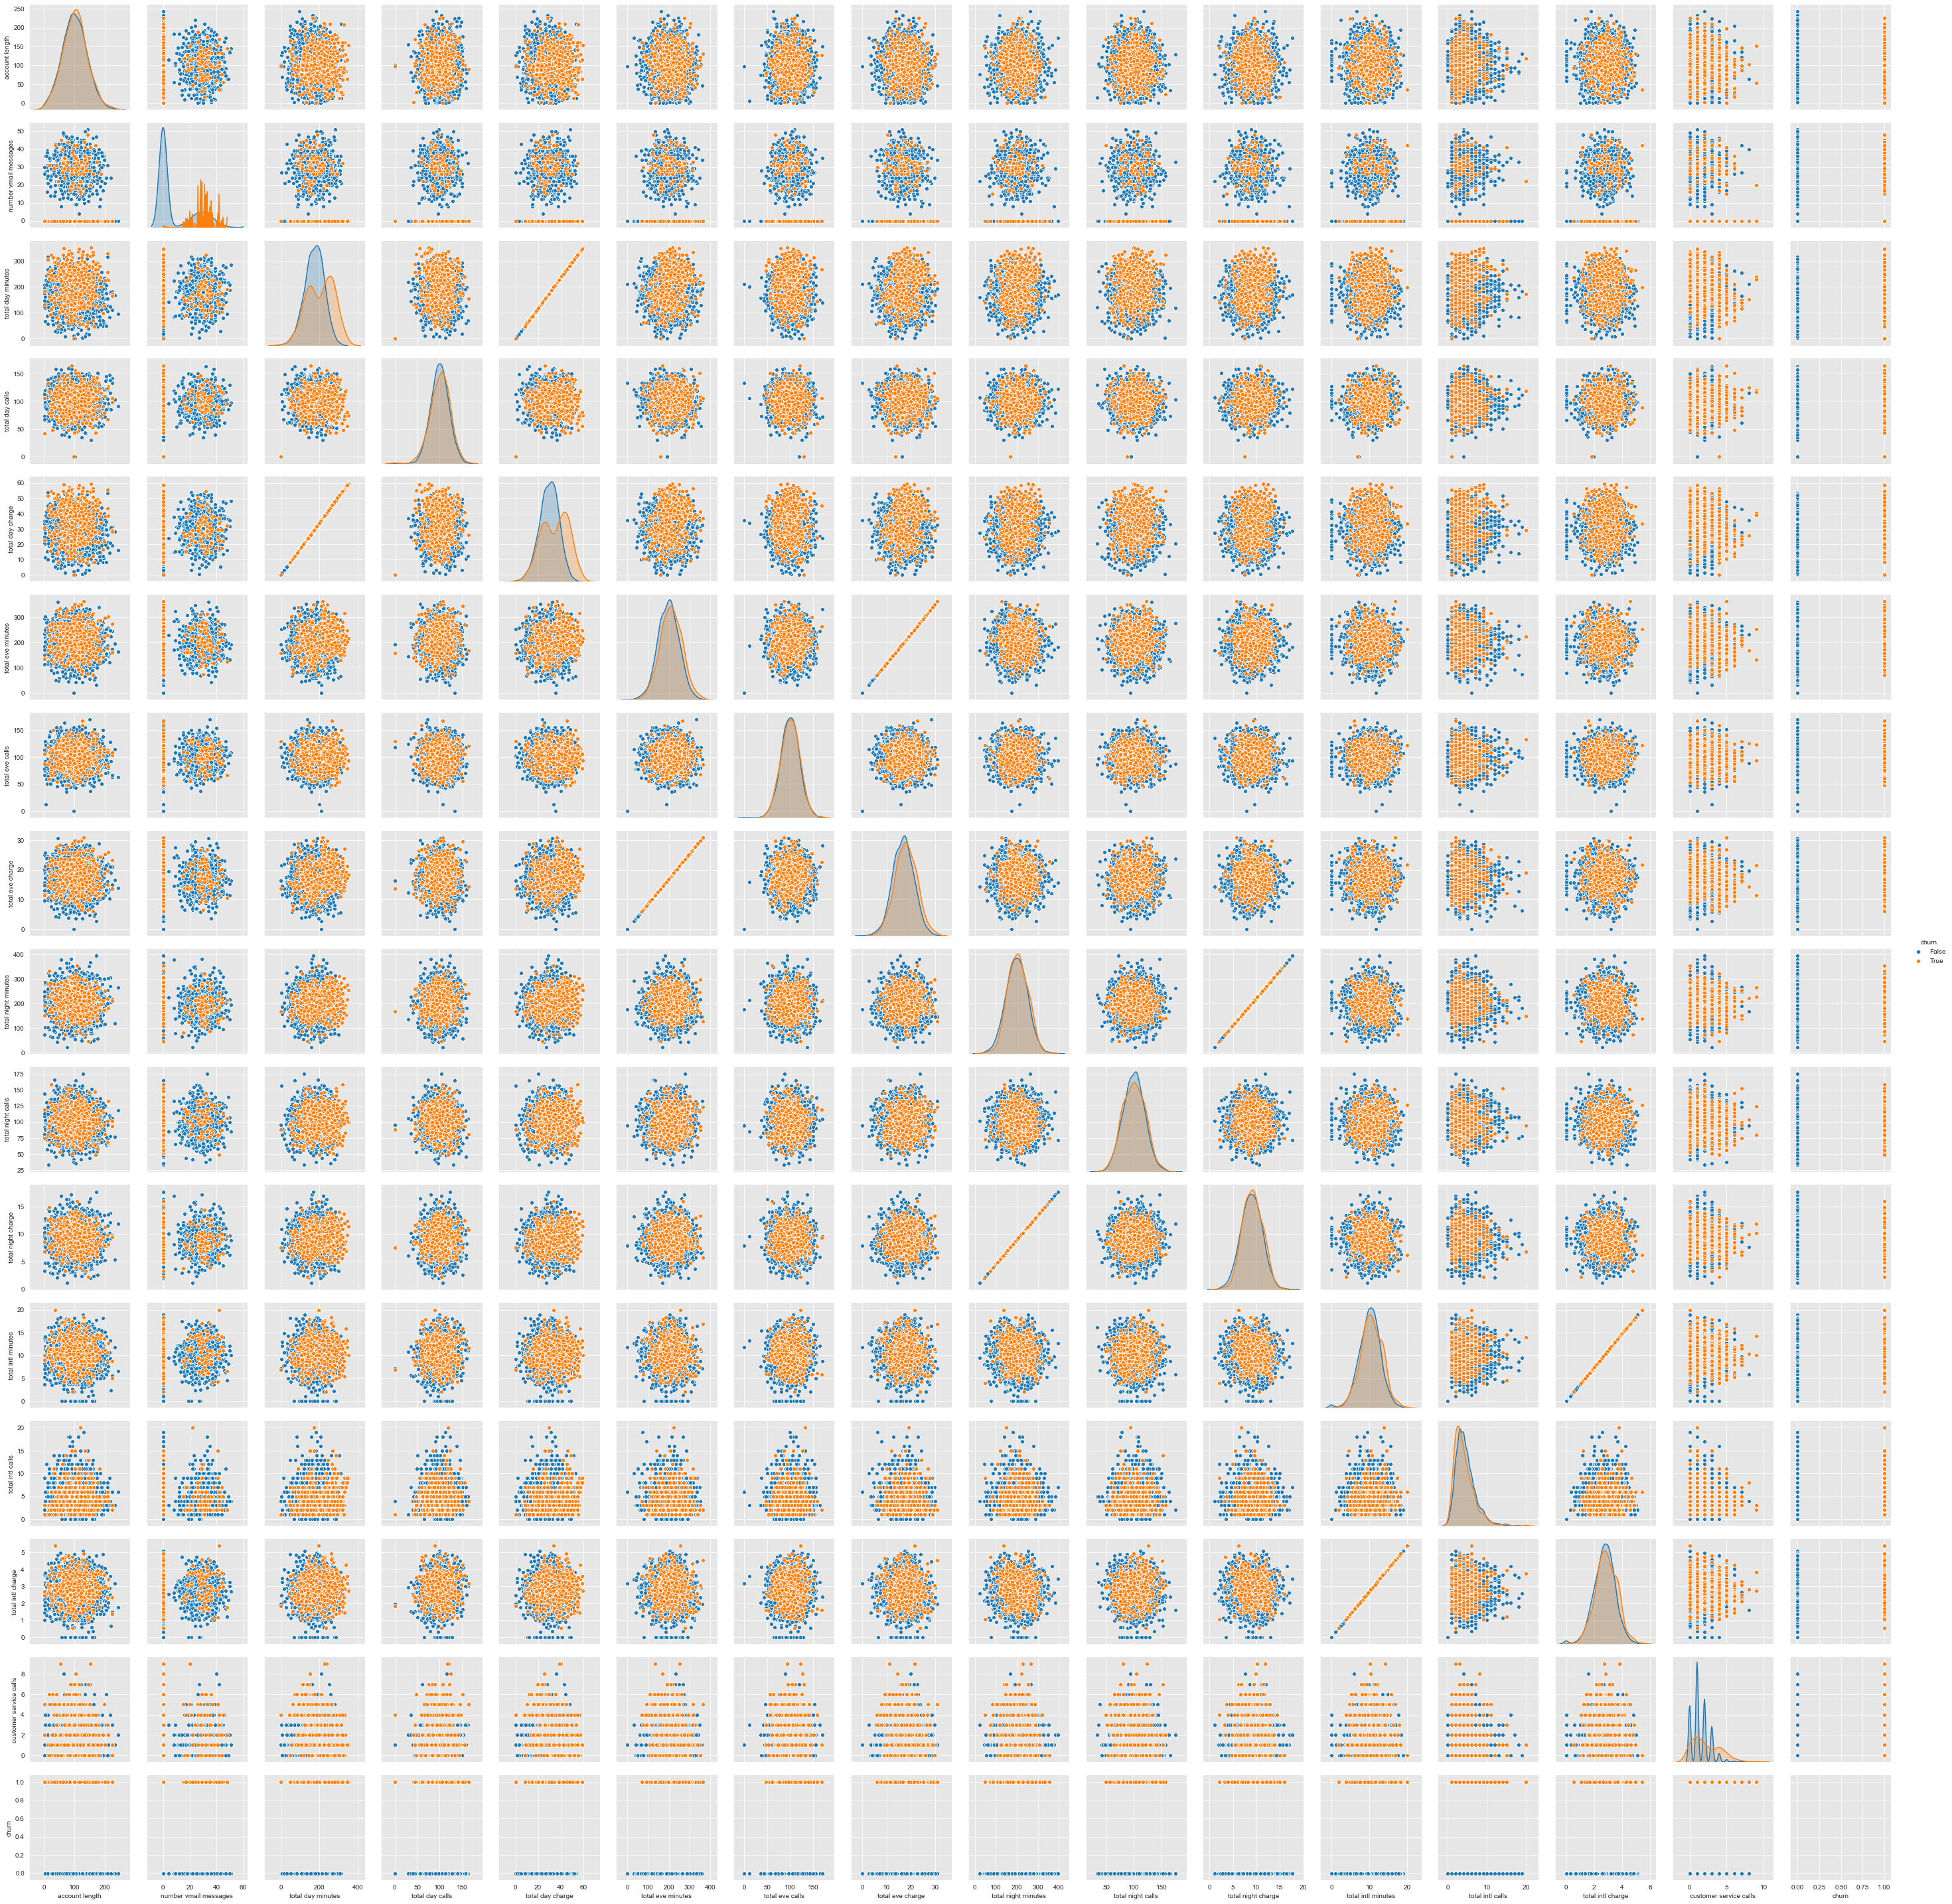

In [112]:
sns.pairplot(df_plot, hue='churn')

In [47]:
df1 = df.drop(['area code', 'phone number'], axis=1)

In [48]:
df1[["churn"]] *= 1

### Saving the cleaned data frame as a new data set.

In [49]:
# df.to_csv("customer_chur_dataset_cleaned.csv", index=False)

In [50]:
X = df1.drop(['churn'], axis=1)
y = df1['churn']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [69]:
X_train['state_VA'].value_counts()

0    2439
1      60
Name: state_VA, dtype: int64

In [62]:
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

# scaled_df_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
# scaled_df_train.head()


account length  number vmail messages  total day minutes  total day calls  \
0       -1.404508              -0.584700          -1.883677         1.330852   
1        0.366388              -0.584700           0.294083         0.529165   
2        0.518179               1.685101           1.056392        -1.875896   
3        2.010792              -0.584700          -0.679156         1.681590   
4        0.290493              -0.584700           0.484660         1.080325   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0         -1.884170           1.037727         0.401340          1.037905   
1          0.293703           0.516178         0.401340          0.517286   
2          1.056666           0.093407         0.849774          0.094283   
3         -0.679320          -0.402459         0.650470         -0.403094   
4          0.484172          -0.718549        -0.296224         -0.719184   

   total night minutes  total night calls  ...  state_TX  state_UT  state_VA  \
0             1.069609           0.004940  ... -0.150014 -0.144338 -0.156845   
1             2.214376           0.670832  ... -0.150014 -0.144338 -0.156845   
2            -0.077125          -0.763398  ... -0.150014 -0.144338 -0.156845   
3            -0.322994          -0.660953  ... -0.150014 -0.144338 -0.156845   
4            -1.186487           0.056162  ... -0.150014 -0.144338 -0.156845   

   state_VT  state_WA  state_WI  state_WV  state_WY  international plan_yes  \
0 -0.144338 -0.147201 -0.163417 -0.175899   -0.1555               -0.327448   
1 -0.144338 -0.147201 -0.163417 -0.175899   -0.1555               -0.327448   
2 -0.144338 -0.147201 -0.163417 -0.175899   -0.1555               -0.327448   
3 -0.144338 -0.147201 -0.163417 -0.175899   -0.1555               -0.327448   
4 -0.144338 -0.147201 -0.163417 -0.175899   -0.1555               -0.327448   

   voice mail plan_yes  
0            -0.611418  
1            -0.611418  
2             1.635543  
3            -0.611418  
4            -0.611418  

[5 rows x 67 columns]

In [64]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred = logreg.predict(X_test)

# Evaluation

In [66]:
cm = confusion_matrix(y_test, y_pred)

In [67]:
cm

array([[  0, 709],
       [  0, 125]])

In [59]:
print ('recall:', recall_score(y_test, y_pred))
print ('precision:', precision_score(y_test, y_pred))
print ('f1 score:', round(f1_score(y_test, y_pred), 4))
print ('accuracy:' , accuracy_score(y_test, y_pred))
print ('r2 score: ', r2_score(y_test, y_pred))
print ('roc auc score: ', roc_auc_score(y_test, y_pred))

recall: 0.16
precision: 0.45454545454545453
f1 score: 0.2367
accuracy: 0.8453237410071942
r2 score:  -0.21394640338504956
roc auc score:  0.5630747531734838


In [60]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       709
           1       0.45      0.16      0.24       125

    accuracy                           0.85       834
   macro avg       0.66      0.56      0.58       834
weighted avg       0.81      0.85      0.81       834



In [21]:
# plot_confusion_matrix(y_test, y_pred)

In [22]:

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)


Training AUC: 0.80397
Testing AUC: 0.7768


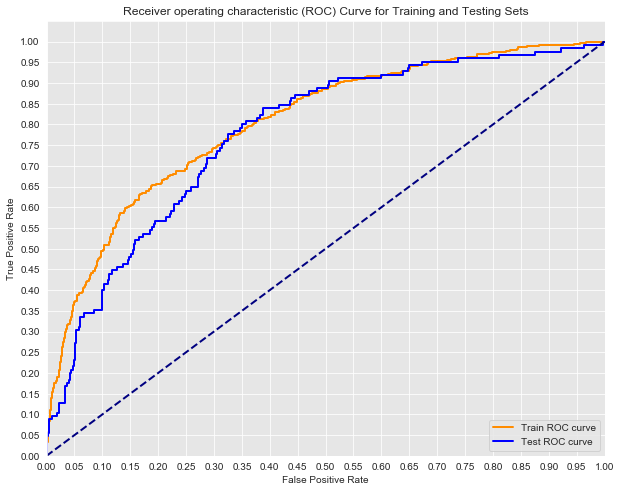

In [23]:


# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='blue',
         lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(round(auc(train_fpr, train_tpr), 5)))
print('Testing AUC: {}'.format(round(auc(test_fpr, test_tpr), 5)))
plt.show()

# Note: I tried all the other solvers here, 'liblinear' gave the best results.

# SMOTE Imbalanced Data

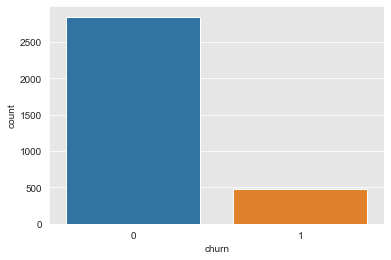

In [24]:
sns.countplot(y);

In [25]:
print(y.value_counts())
print(y.value_counts(normalize=True))

0    2850
1     483
Name: churn, dtype: int64
0    0.855086
1    0.144914
Name: churn, dtype: float64


In [26]:
smote = SMOTE()
X_train_smoted, y_train_smoted = smote.fit_sample(X_train, y_train)

In [27]:
logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='liblinear')
model_log = logreg.fit(X_train_smoted, y_train_smoted)
model_log


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred)

In [30]:
cm

array([[536, 173],
       [ 36,  89]])

In [31]:
print ('recall:', recall_score(y_test, y_pred))
print ('precision:', precision_score(y_test, y_pred))
print ('f1 score:', round(f1_score(y_test, y_pred), 4))
print ('accuracy:' , accuracy_score(y_test, y_pred))
print ('r2 score: ', r2_score(y_test, y_pred))
print ('roc auc score: ', roc_auc_score(y_test, y_pred))

recall: 0.712
precision: 0.33969465648854963
f1 score: 0.4599
accuracy: 0.749400479616307
r2 score:  -0.966781382228491
roc auc score:  0.7339971791255289


In [32]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       709
           1       0.34      0.71      0.46       125

    accuracy                           0.75       834
   macro avg       0.64      0.73      0.65       834
weighted avg       0.85      0.75      0.78       834



In [38]:
# Calculate the probability scores of each point in the training set
y_train_score_SMOTE = model_log.decision_function(X_train_smoted)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr_SMOTE, train_tpr_SMOTE, thresholds_SMOTE = roc_curve(y_train_smoted, y_train_score_SMOTE)

# Calculate the probability scores of each point in the test set
y_test_score_SMOTE = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr_SMOTE, test_tpr_SMOTE, test_thresholds_SMOTE = roc_curve(y_test, y_test_score_SMOTE)


Training AUC, SMOTE: 0.83395
Testing AUC, SMOTE: 0.78344


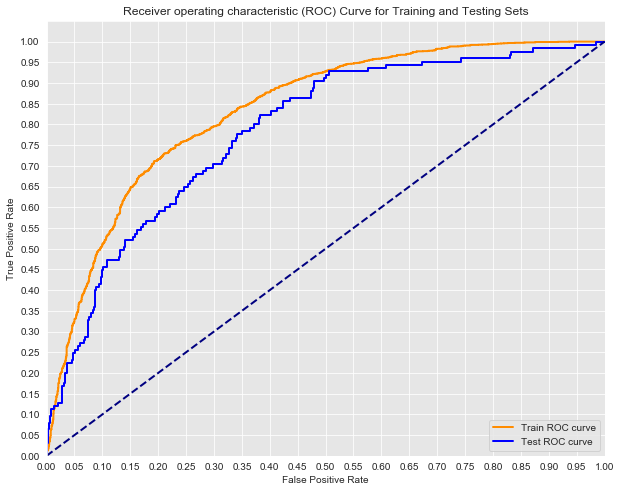

In [39]:

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr_SMOTE, train_tpr_SMOTE, color='darkorange',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr_SMOTE, test_tpr_SMOTE, color='blue',
         lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
plt.legend(loc='lower right')
print('Training AUC, SMOTE: {}'.format(round(auc(train_fpr_SMOTE, train_tpr_SMOTE), 5)))
print('Testing AUC, SMOTE: {}'.format(round(auc(test_fpr_SMOTE, test_tpr_SMOTE), 5)))
plt.show()

In [36]:
adasyn = ADASYN()

recall: 0.64
precision: 0.3225806451612903
f1 score: 0.429
accuracy: 0.7446043165467626
r2 score:  -1.0044231311706633
roc auc score:  0.7015232722143865
              precision    recall  f1-score   support

           0       0.92      0.76      0.84       709
           1       0.32      0.64      0.43       125

    accuracy                           0.74       834
   macro avg       0.62      0.70      0.63       834
weighted avg       0.83      0.74      0.77       834

Training AUC, ADASYN: 0.84283
Testing AUC, ADASYN: 0.78344


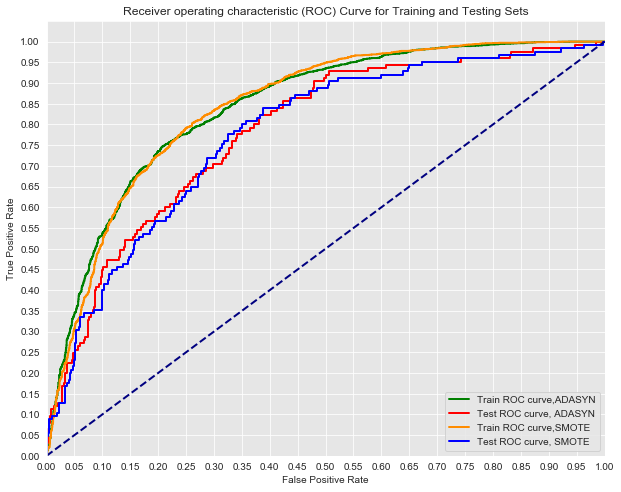

In [37]:
# ADASYN Imbalanced Data


X_train_ada, y_train_ada = adasyn.fit_sample(X_train, y_train)

logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='liblinear')
model_log = logreg.fit(X_train_ada, y_train_ada)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print ('recall:', recall_score(y_test, y_pred))
print ('precision:', precision_score(y_test, y_pred))
print ('f1 score:', round(f1_score(y_test, y_pred), 4))
print ('accuracy:' , accuracy_score(y_test, y_pred))
print ('r2 score: ', r2_score(y_test, y_pred))
print ('roc auc score: ', roc_auc_score(y_test, y_pred))

cr = classification_report(y_test, y_pred)
print(cr)

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train_ada)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train_ada, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)



# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='green',
         lw=lw, label='Train ROC curve,ADASYN')
plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='Test ROC curve, ADASYN')

plt.plot(train_fpr_SMOTE, train_tpr_SMOTE, color='darkorange',
         lw=lw, label='Train ROC curve,SMOTE')
plt.plot(test_fpr_SMOTE, test_tpr_SMOTE, color='blue',
         lw=lw, label='Test ROC curve, SMOTE')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
plt.legend(loc='lower right')
print('Training AUC, ADASYN: {}'.format(round(auc(train_fpr, train_tpr), 5)))
print('Testing AUC, ADASYN: {}'.format(round(auc(test_fpr, test_tpr), 5)))
plt.show()

# We can try to solve multicollinearity by interactions